# Chapter 9 Data visualization in practice

In this chapter, we will demonstrate how relatively simple __ggplot2__ code can create insightful and aesthetically pleasing plots. As motivation we will create plots that help us better understand trends in world health and economics. We will implement what we learned in Chapters 7 and 8.16 and learn how to augment the code to perfect the plots. As we go through our case study, we will describe relevant general data visualization principles and learn concepts such as _faceting_, _time series plots_, _transformations_, and _ridge plots_.

$~$
## 9.1 Case study: new insights on poverty

Hans Rosling was the co-founder of the Gapminder Foundation, an organization dedicated to educating the public by using data to dispel common myths about the so-called developing world. The organization uses data to show how actual trends in health and economics contradict the narratives that emanate from sensationalist media coverage of catastrophes, tragedies, and other unfortunate events. As stated in the Gapminder Foundation’s website:

    Journalists and lobbyists tell dramatic stories. That’s their job. They tell stories about extraordinary events and unusual people. The piles of dramatic stories pile up in peoples’ minds into an over-dramatic worldview and strong negative stress feelings: “The world is getting worse!”, “It’s we vs. them!”, “Other people are strange!”, “The population just keeps growing!” and “Nobody cares!”

Hans Rosling conveyed actual data-based trends in a dramatic way of his own, using effective data visualization. This section is based on two talks that exemplify this approach to education: [New Insights on Poverty] and The Best Stats You’ve Ever Seen. Specifically, in this section, we use data to attempt to answer the following two questions:

 1. Is it a fair characterization of today’s world to say it is divided into western rich nations and the developing world in Africa, Asia, and Latin America?
 2. Has income inequality across countries worsened during the last 40 years?
 
To answer these questions, we will be using the `gapminder` dataset provided in __dslabs__ This dataset was created using a number of spreadsheets available from the Gapminder Foundation. You can access the table like this:

In [2]:
library(tidyverse)
library(dslabs)
data(gapminder)
gapminder %>% as_tibble() %>% head

library(repr)
options(repr.plot.width=8, repr.plot.height=6)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.2     √ purrr   0.3.4
√ tibble  3.0.3     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.3.1     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


### 9.1.1 Hans Rosling’s quiz

As done in the _New Insights on Poverty_ video, we start by testing our knowledge regarding differences in child mortality across different countries. For each of the six pairs of countries below, which country do you think had the highest child mortality rates in 2015? Which pairs do you think are most similar?

 1. Sri Lanka or Turkey
 2. Poland or South Korea
 3. Malaysia or Russia
 4. Pakistan or Vietnam
 5. Thailand or South Africa
 
When answering these questions without data, the non-European countries are typically picked as having higher child mortality rates: Sri Lanka over Turkey, South Korea over Poland, and Malaysia over Russia. It is also common to assume that countries considered to be part of the developing world: Pakistan, Vietnam, Thailand, and South Africa, have similarly high mortality rates.

To answer these questions __with data__, we can use __dplyr__. For example, for the first comparison we see that:

In [3]:
gapminder %>% 
    filter(year == 2015 & country %in% c("Sri Lanka", "Turkey")) %>%
    select(country, infant_mortality)

country,infant_mortality
<fct>,<dbl>
Sri Lanka,8.4
Turkey,11.6


Turkey has the higher infant mortality rate.

We can use this code on all comparisons and find the following:


|country|	infant mortality|	country	|infant mortality|
|-|-|-|-|
|Sri Lanka|	8.4|	Turkey|	11.6|
|Poland	|4.5	|South Korea|	2.9|
|Malaysia|	6.0|	Russia|	8.2|
|Pakistan	|65.8	|Vietnam|	17.3|
|Thailand	|10.5	|South Africa|	33.6|

We see that the European countries on this list have higher child mortality rates: Poland has a higher rate than South Korea, and Russia has a higher rate than Malaysia. We also see that Pakistan has a much higher rate than Vietnam, and South Africa has a much higher rate than Thailand. It turns out that when Hans Rosling gave this quiz to educated groups of people, the average score was less than 2.5 out of 5, worse than what they would have obtained had they guessed randomly. This implies that more than ignorant, we are misinformed. In this chapter we see how data visualization helps inform us.

$~$
## 9.2 Scatterplots

The reason for this stems from the preconceived notion that the world is divided into two groups: the western world (Western Europe and North America), characterized by long life spans and small families, versus the developing world (Africa, Asia, and Latin America) characterized by short life spans and large families. But do the data support this dichotomous view?

The necessary data to answer this question is also available in our `gapminder` table. Using our newly learned data visualization skills, we will be able to tackle this challenge.

In order to analyze this world view, our first plot is a scatterplot of life expectancy versus fertility rates (average number of children per woman). We start by looking at data from about 50 years ago, when perhaps this view was first cemented in our minds.

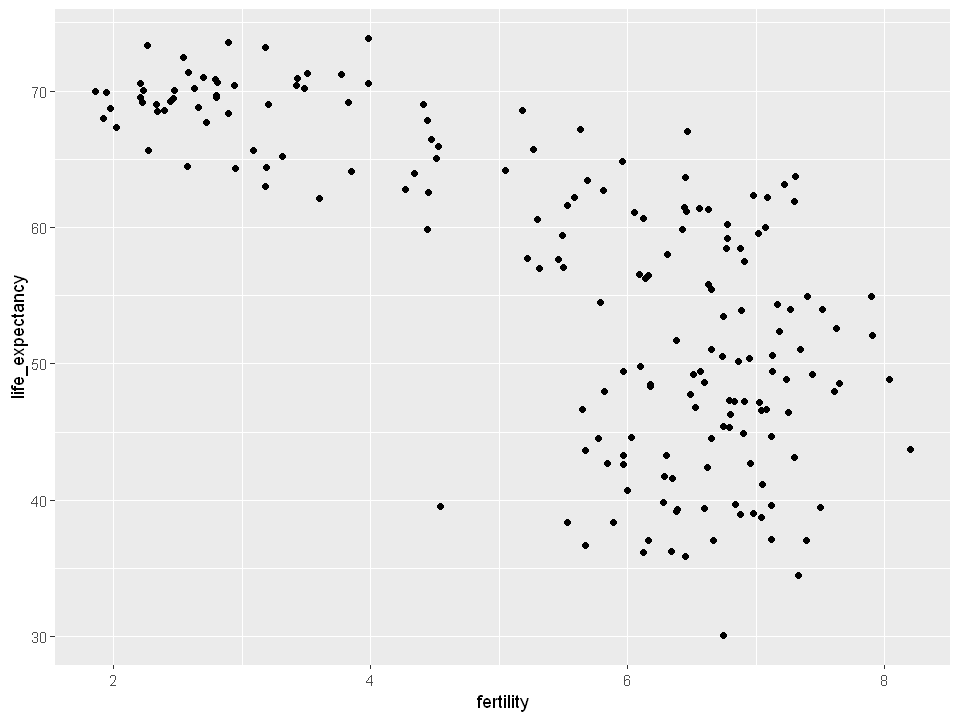

In [56]:
filter(gapminder, year == 1962) %>%
    ggplot(aes(fertility, life_expectancy)) +
    geom_point()

Most points fall into two distinct categories:

 1. Life expectancy around 70 years and 3 or fewer children per family.
 2. Life expectancy lower than 65 years and more than 5 children per family.
 
To confirm that indeed these countries are from the regions we expect, we can use color to represent continent.

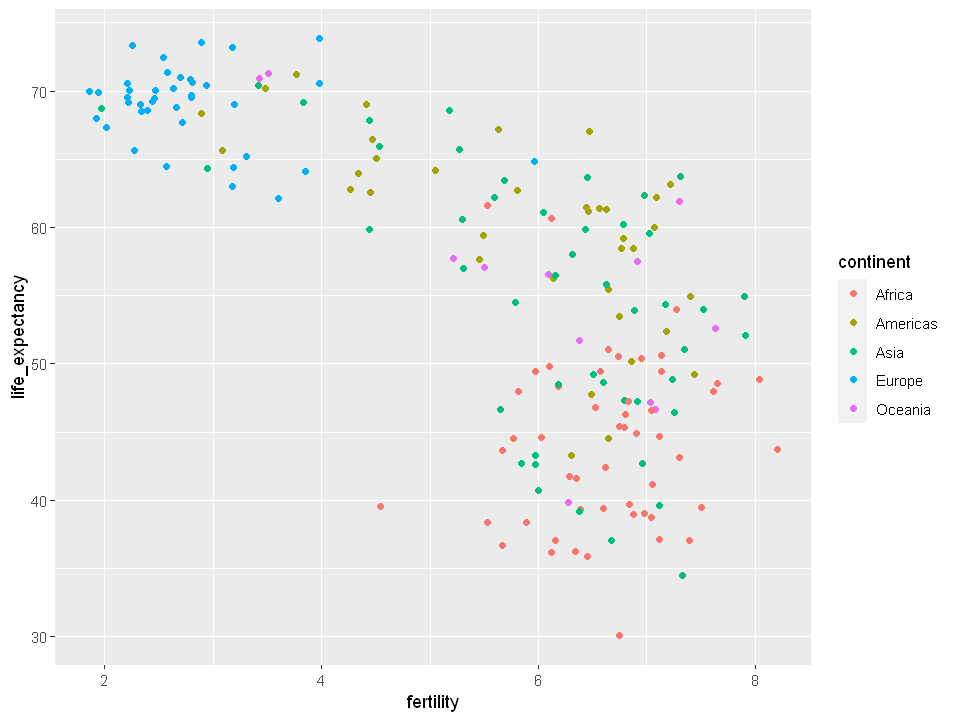

In [57]:
gapminder %>% filter(year == 1962) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point()

In 1962, “the West versus developing world” view was grounded in some reality. Is this still the case 50 years later?

$~$
## 9.3 Faceting

We could easily plot the 2012 data in the same way we did for 1962. To make comparisons, however, side by side plots are preferable. In __ggplot2__, we can achieve this by _faceting_ variables: we stratify the data by some variable and make the same plot for each strata.

To achieve faceting, we add a layer with the function `facet_grid`, which automatically separates the plots. This function lets you facet by up to two variables using columns to represent one variable and rows to represent the other. The function expects the row and column variables to be separated by a `~`. Here is an example of a scatterplot with `facet_grid` added as the last layer:

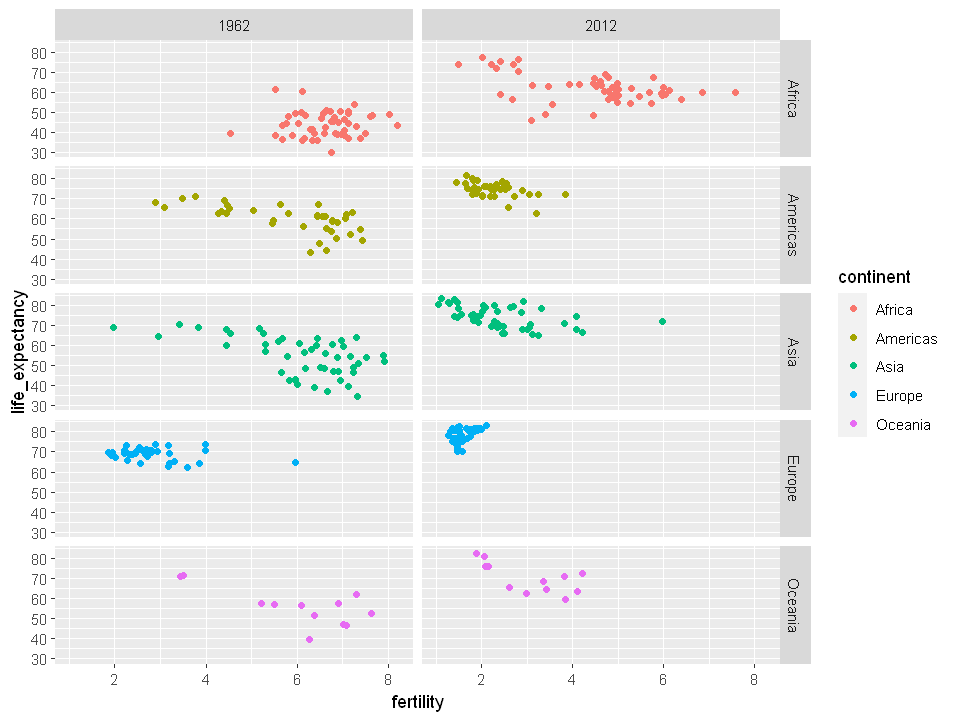

In [58]:
gapminder %>% filter(year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col= continent)) +
    geom_point() +
    facet_grid(continent~year)

We see a plot for each continent/year pair. However, this is just an example and more than what we want, which is simply to compare 1962 and 2012. In this case, there is just one variable and we use `.` to let facet know that we are not using one of the variables:

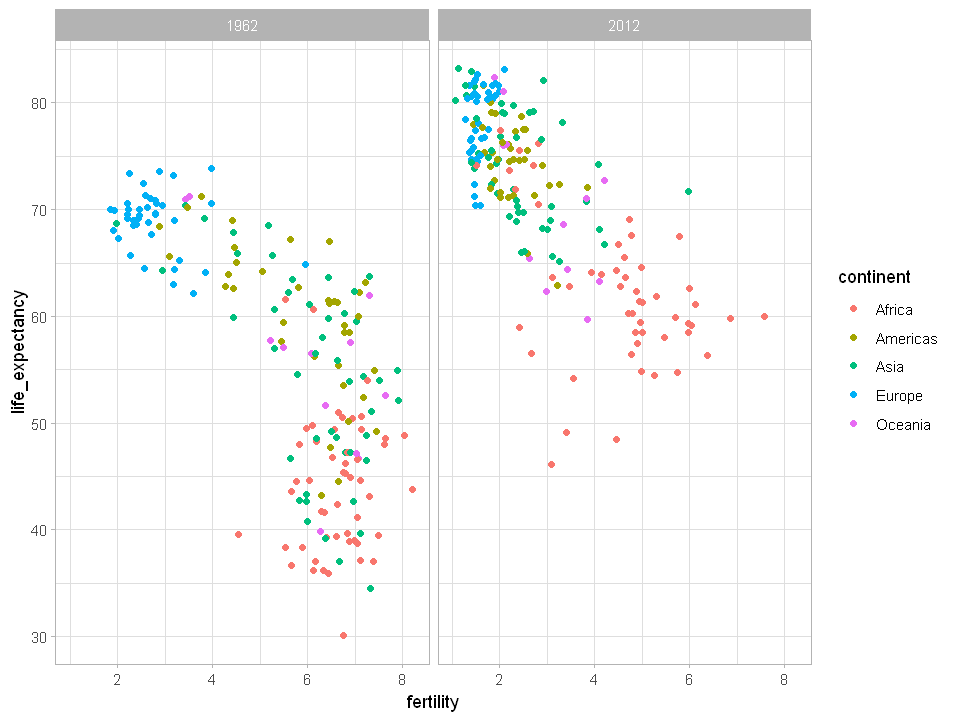

In [59]:
gapminder %>% filter(year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col=continent)) +
    geom_point() +
    facet_grid(.~year) +
    theme_light()

This plot clearly shows that the majority of countries have moved from the _developing world_ cluster to the _western world_ one. In 2012, the western versus developing world view no longer makes sense. This is particularly clear when comparing Europe to Asia, the latter of which includes several countries that have made great improvements.

$~$
### 9.3.1 `facet_wrap`

To explore how this transformation happened through the years, we can make the plot for several years. For example, we can add 1970, 1980, 1990, and 2000. If we do this, we will not want all the plots on the same row, the default behavior of `facet_grid`, since they will become too thin to show the data. Instead, we will want to use multiple rows and columns. The function `facet_wrap` permits us to do this by automatically wrapping the series of plots so that each display has viewable dimensions:

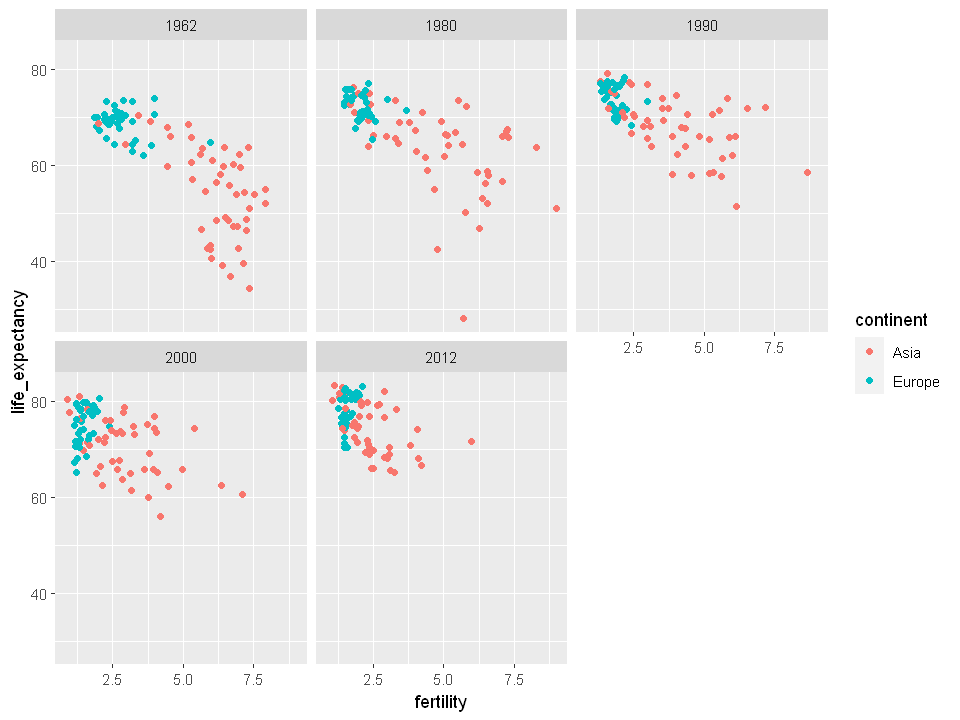

In [60]:
years <- c(1962, 1980, 1990, 2000, 2012)
continents <- c("Europe", "Asia")
gapminder %>%
    filter(year %in% years & continent %in% continents) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point()+
    facet_wrap(~year)

This plot clearly shows how most Asian countries have improved at a much faster rate than European ones.

$~$
### 9.3.2 Fixed scales for better comparisons

The default choice of the range of the axes is important. When not using `facet`, this range is determined by the data shown in the plot. When using `facet`, this range is determined by the data shown in all plots and therefore kept fixed across plots. This makes comparisons across plots much easier. For example, in the above plot, we can see that life expectancy has increased and the fertility has decreased across most countries. We see this because the cloud of points moves. This is not the case if we adjust the scales:

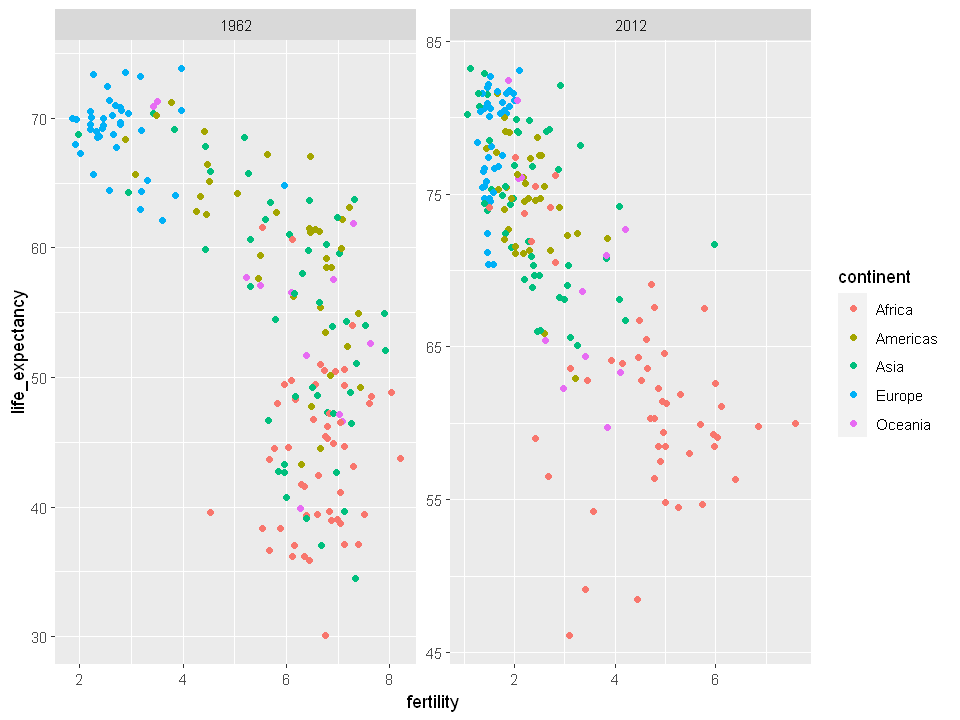

In [61]:
gapminder %>% filter(year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point() +
    facet_wrap(.~year, scale = "free")

In the plot above, we have to pay special attention to the range to notice that the plot on the right has a larger life expectancy.

$~$
## 9.4 Time series plots

The visualizations above effectively illustrate that data no longer supports the western versus developing world view. Once we see these plots, new questions emerge. For example, which countries are improving more and which ones less? Was the improvement constant during the last 50 years or was it more accelerated during certain periods? For a closer look that may help answer these questions, we introduce `time series plots`.

Time series plots have time in the x-axis and an outcome or measurement of interest on the y-axis. For example, here is a trend plot of United States fertility rates:

Warning message:
"Removed 1 rows containing missing values (geom_point)."


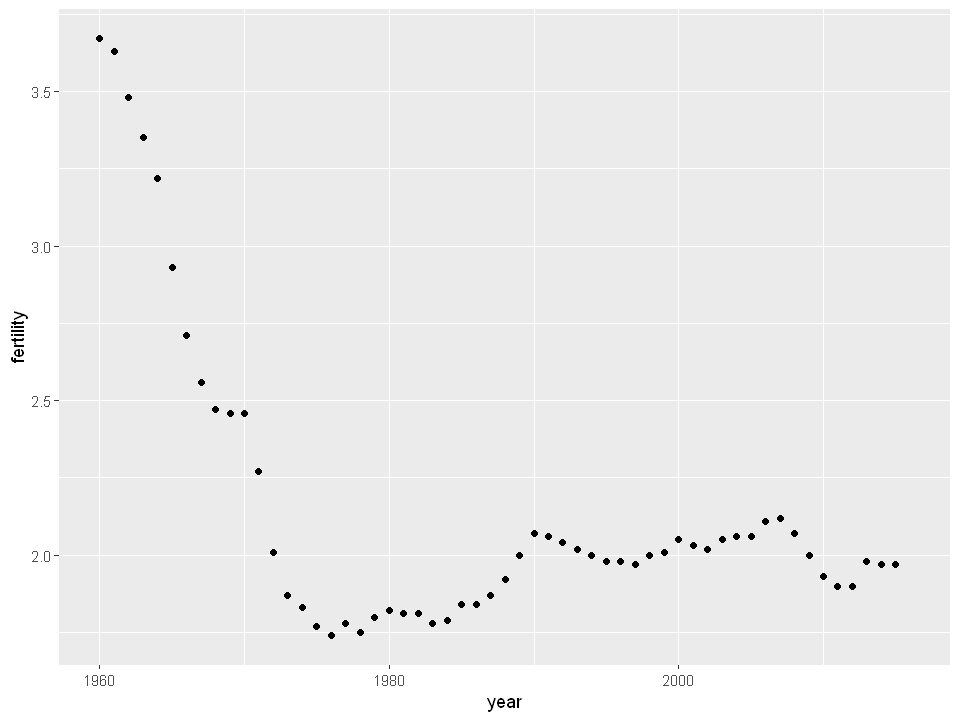

In [62]:
gapminder %>%
    filter(country == 'United States') %>%
    ggplot(aes(year, fertility)) +
    geom_point()

We see that the trend is not linear at all. Instead there is sharp drop during the 1960s and 1970s to below 2. Then the trend comes back to 2 and stabilizes during the 1990s.

When the points are regularly and densely spaced, as they are here, we create curves by joining the points with lines, to convey that these data are from a single series, here a country. To do this, we use the `geom_line` function instead of `geom_point`.

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


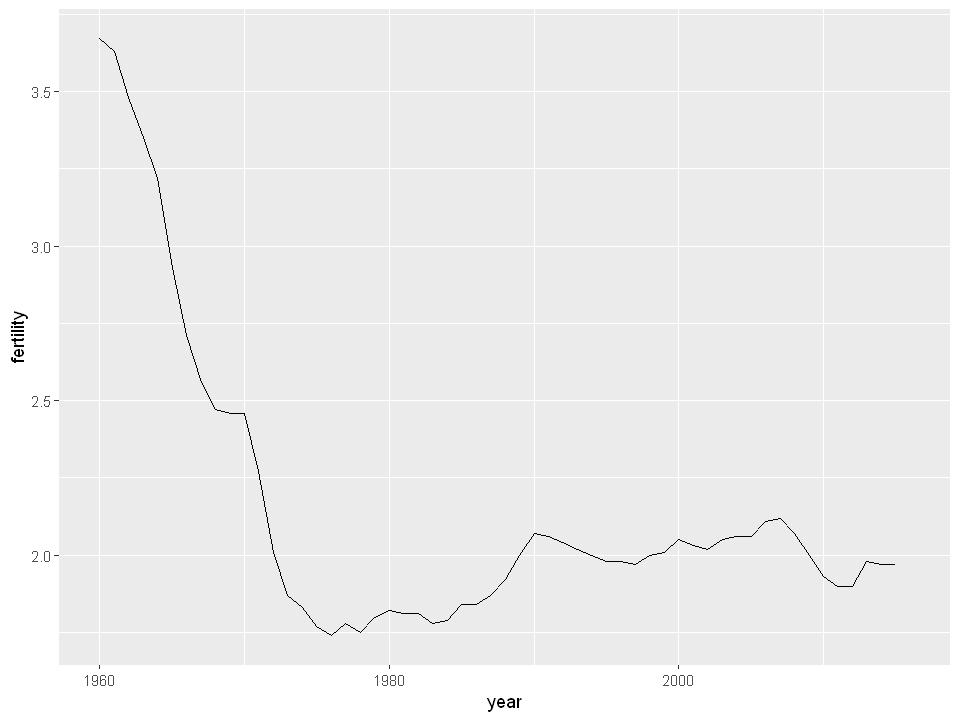

In [63]:
gapminder %>%
    filter(country == "United States") %>%
    ggplot(aes(year, fertility)) +
    geom_line()

This is particularly helpful when we look at two countries. If we subset the data to include two countries, one from Europe and one from Asia, then adapt the code above:

Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


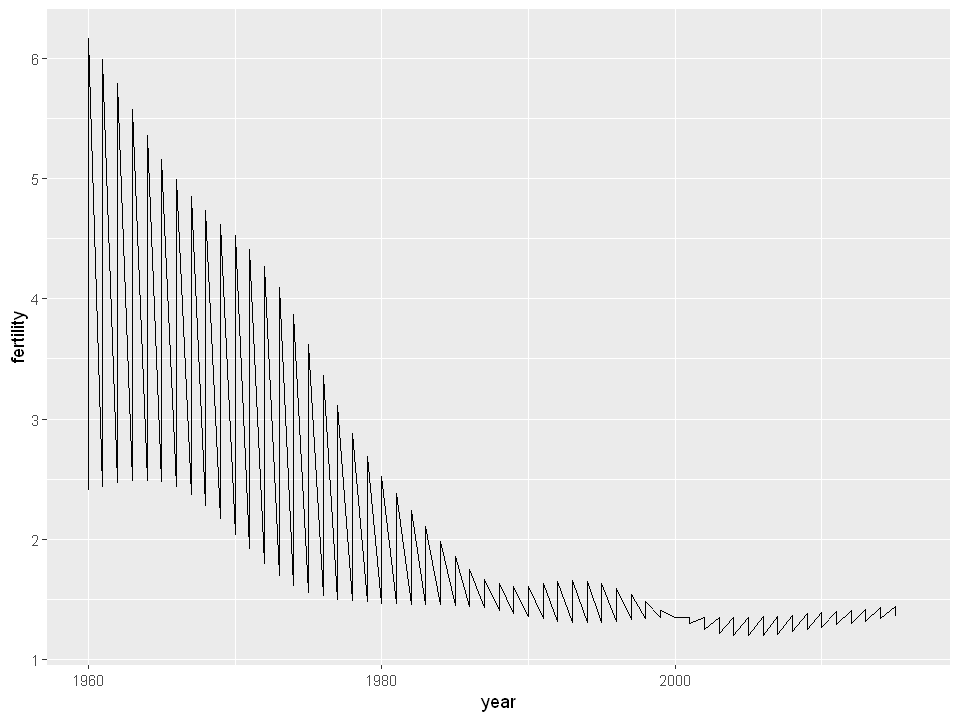

In [64]:
countries <- c("South Korea", "Germany")

gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, fertility)) +
    geom_line()

Unfortunately, this is __not__ the plot that we want. Rather than a line for each country, the points for both countries are joined. This is actually expected since we have not told `ggplot` anything about wanting two separate lines. To let `ggplot` know that there are two curves that need to be made separately, we assign each point to a `group`, one for each country:

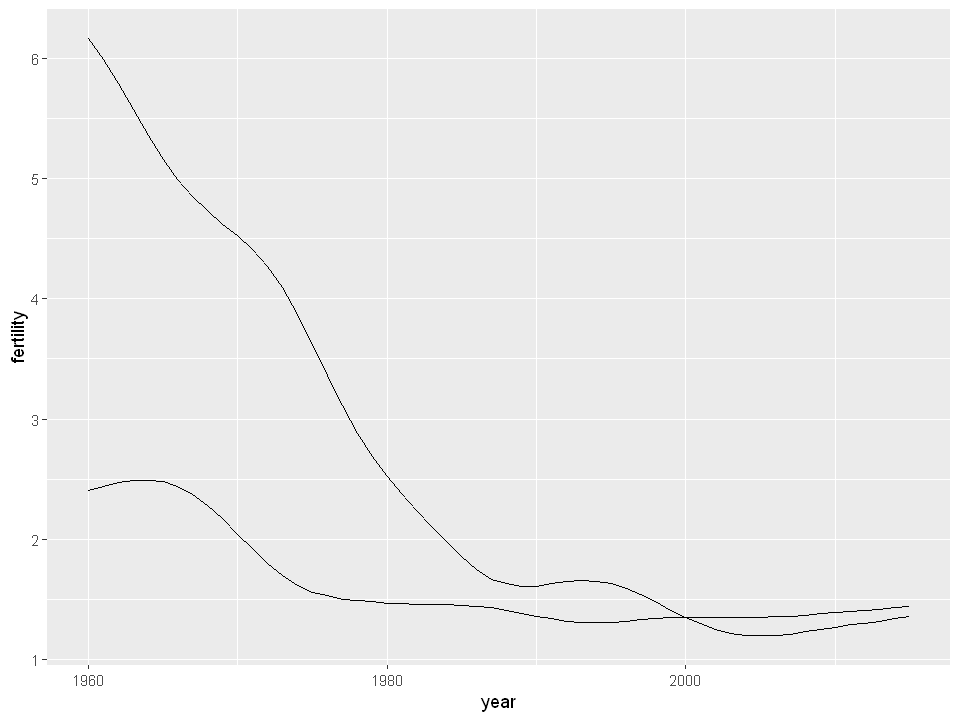

In [65]:
countries <- c("South Korea","Germany")

gapminder %>% filter(country %in% countries & !is.na(fertility)) %>%
    ggplot(aes(year, fertility, group = country)) +
    geom_line()

But which line goes with which country? We can assign colors to make this distinction. A useful side-effect of using the `color` argument to assign different colors to the different countries is that the data is automatically grouped:

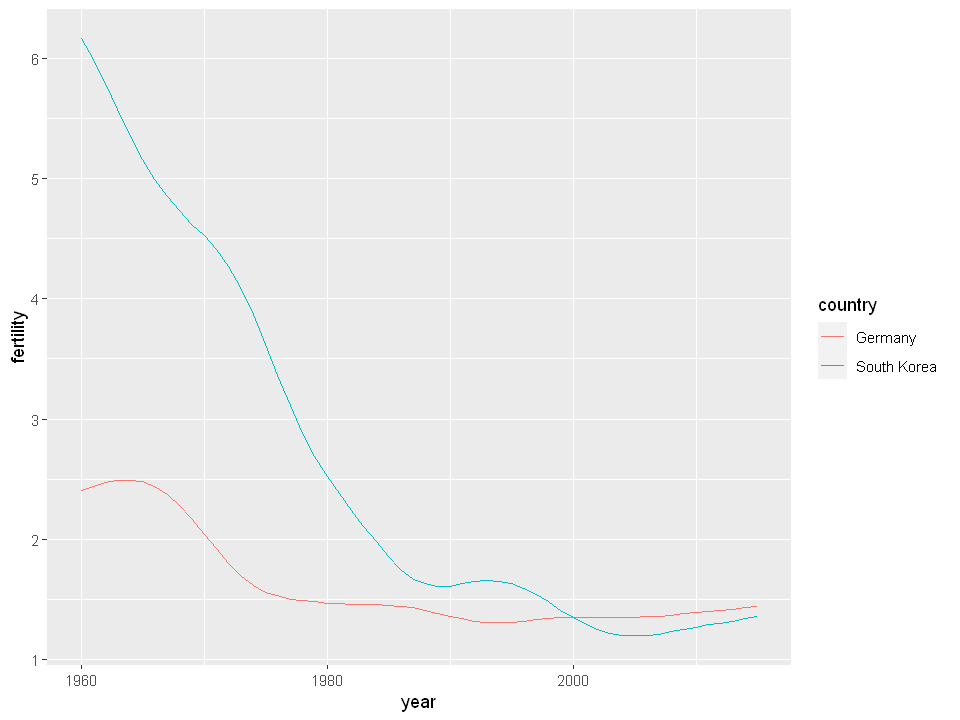

In [66]:
countries <- c("South Korea","Germany")

gapminder %>% filter(country %in% countries & !is.na(fertility)) %>%
    ggplot(aes(year, fertility, col = country)) +
    geom_line()

The plot clearly shows how South Korea’s fertility rate dropped drastically during the 1960s and 1970s, and by 1990 had a similar rate to that of Germany.

$~$
### 9.4.1 Labels instead of legends

For trend plots we recommend labeling the lines rather than using legends since the viewer can quickly see which line is which country. This suggestion actually applies to most plots: labeling is usually preferred over legends.

We demonstrate how we can do this using the life expectancy data. We define a data table with the label locations and then use a second mapping just for these labels:

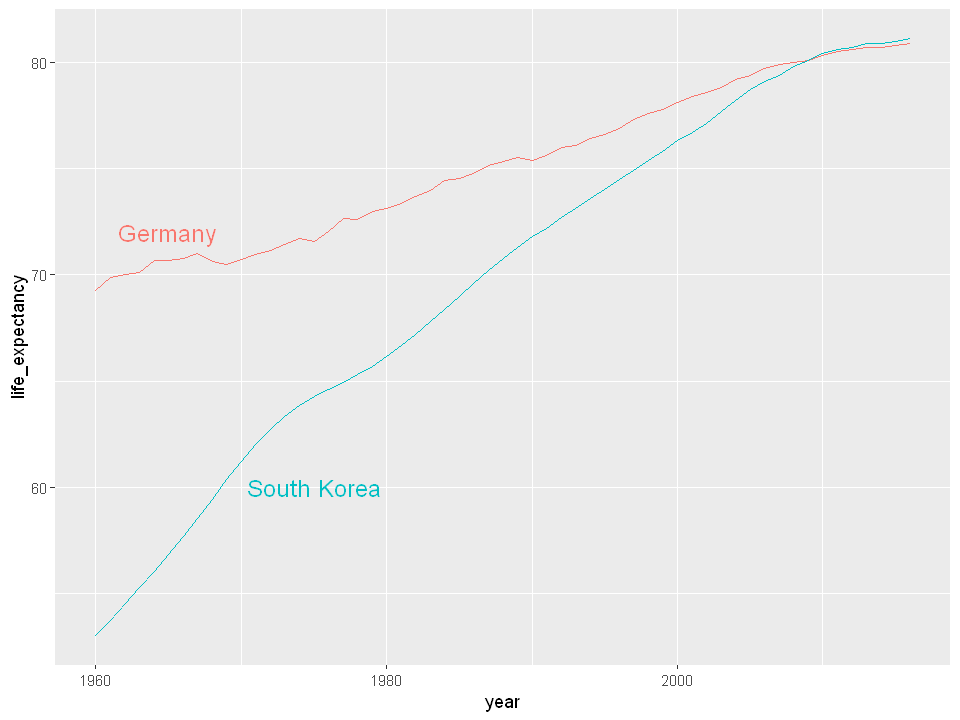

In [68]:
labels <- data.frame(country = countries, x = c(1975, 1965), y = c(60, 72))

gapminder %>%
    filter(country %in% countries) %>%
    ggplot(aes(year, life_expectancy, col = country)) +
    geom_line() +
    geom_text(data = labels, aes(x, y, label = country), size = 5) +
    theme(legend.position = "none")

The plot clearly shows how an improvement in life expectancy followed the drops in fertility rates. In 1960, Germans lived 15 years longer than South Koreans, although by 2010 the gap is completely closed. It exemplifies the improvement that many non-western countries have achieved in the last 40 years.

$~$
## 9.5 Data transformations

We now shift our attention to the second question related to the commonly held notion that wealth distribution across the world has become worse during the last decades. When general audiences are asked if poor countries have become poorer and rich countries become richer, the majority answers yes. By using stratification, histograms, smooth densities, and boxplots, we will be able to understand if this is in fact the case. First we learn how transformations can sometimes help provide more informative summaries and plots.

The `gapminder` data table includes a column with the countries’ gross domestic product (GDP). GDP measures the market value of goods and services produced by a country in a year. The GDP per person is often used as a rough summary of a country’s wealth. Here we divide this quantity by 365 to obtain the more interpretable measure `dollars per day`. Using current US dollars as a unit, a person surviving on an income of less than $2 a day is defined to be living in _absolute poverty_. We add this variable to the data table:

In [6]:
gapminder<- gapminder %>% mutate(dollars_per_day = gdp/population/365)

The GDP values are adjusted for inflation and represent current US dollars, so these values are meant to be comparable across the years. Of course, these are country averages and within each country there is much variability. All the graphs and insights described below relate to country averages and not to individuals.

$~$
### 9.5.1 Log transformation

Here is a histogram of per day incomes from 1970:

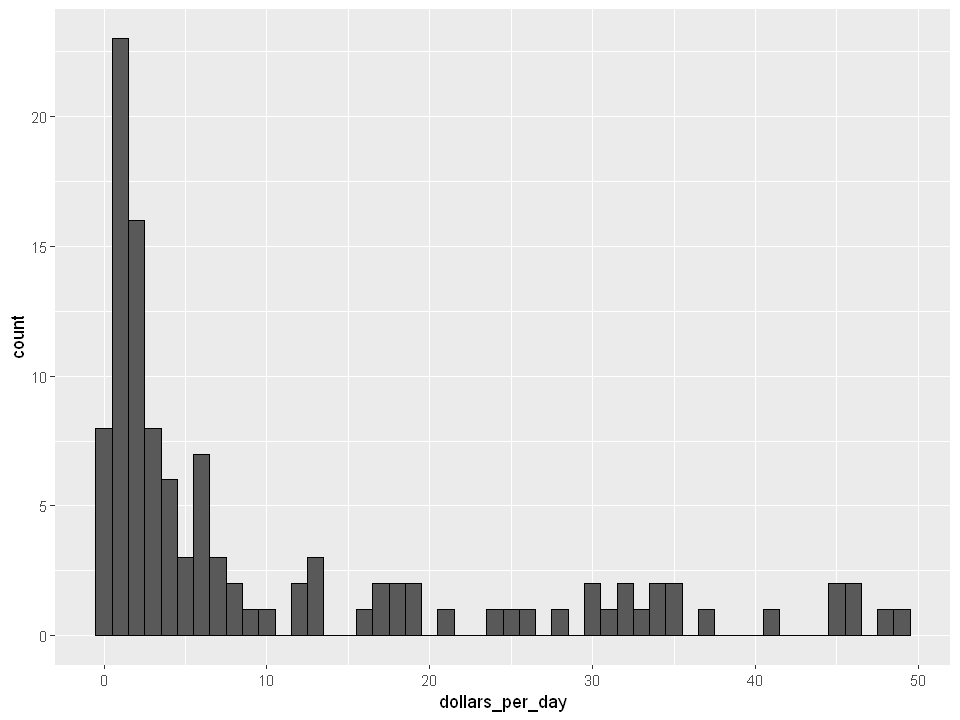

In [72]:
past_year <-1970
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black")

We use the `color = "black"` argument to draw a boundary and clearly distinguish the bins.

In this plot, we see that for the majority of countries, averages are below \\$10 a day. However, the majority of the x-axis is dedicated to the 35 countries with averages above \\$10. So the plot is not very informative about countries with values below \\$10 a day.

It might be more informative to quickly be able to see how many countries have average daily incomes of about \\$1 (extremely poor), \\$2 (very poor), \\$4 (poor), \\$8 (middle), \\$16 (well off), \\$32 (rich), \\$64 (very rich) per day. These changes are multiplicative and log transformations convert multiplicative changes into additive ones: when using base 2, a doubling of a value turns into an increase by 1.

Here is the distribution if we apply a log base 2 transform:

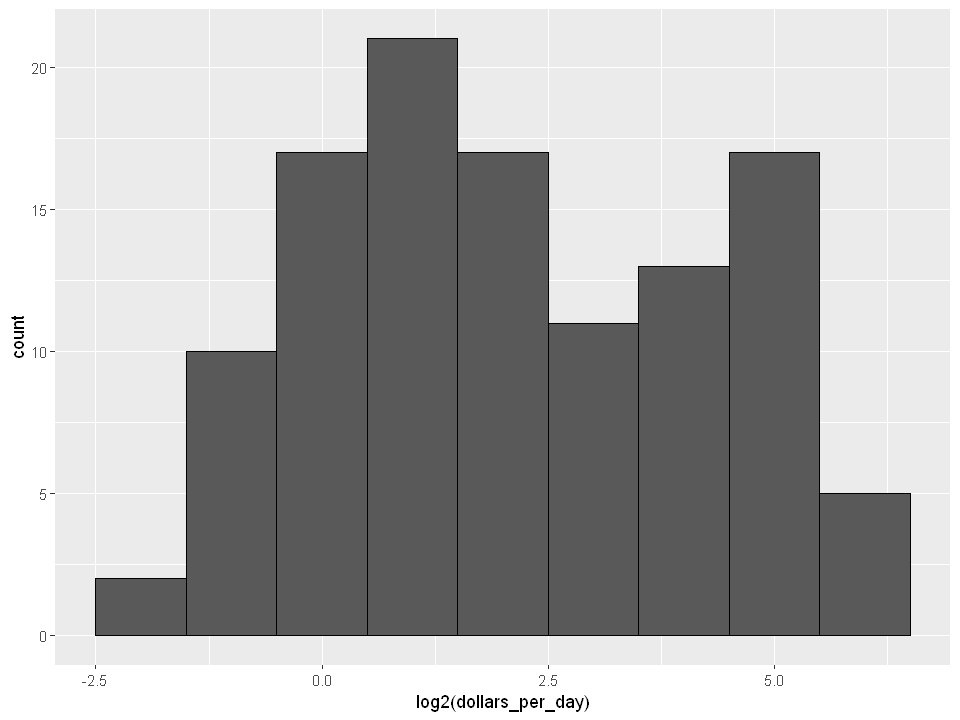

In [73]:
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(log2(dollars_per_day)))+
    geom_histogram(binwidth = 1, color = "black")

In a way this provides a _close-up_ of the mid to lower income countries.

$~$
### 9.5.2 Which base?

In the case above, we used base 2 in the log transformations. Other common choices are base  
$e$(the natural log) and base 10.

In general, we do not recommend using the natural log for data exploration and visualization. This is because while $2^2, 2^3, 2^4,\ldots$ or $10^2, 10^3,\ldots$ are easy to compute in our heads, the same is not true for $e^2, e^3, \ldots$, so the scale is not intuitive or easy to interpret.

In the dollars per day example, we used base 2 instead of base 10 because the resulting range is easier to interpret. The range of the values being plotted is 0.327, 48.885.

In base 10, this turns into a range that includes very few integers: just 0 and 1. With base two, our range includes -2, -1, 0, 1, 2, 3, 4, and 5. It is easier to compute $2^x$ and $10^x$ when $x$ is an integer and between -10 and 10, so we prefer to have smaller integers in the scale. Another consequence of a limited range is that choosing the binwidth is more challenging. With log base 2, we know that a binwidth of 1 will translate to a bin with range $x$ to $2x$.

For an example in which base 10 makes more sense, consider population sizes. A log base 10 is preferable since the range for these is:

In [75]:
filter(gapminder, year == past_year) %>%
    summarize(min = min(population), max(population))

min,max(population)
<dbl>,<dbl>
46075,808510713


Here is the histogram of the transformed values:

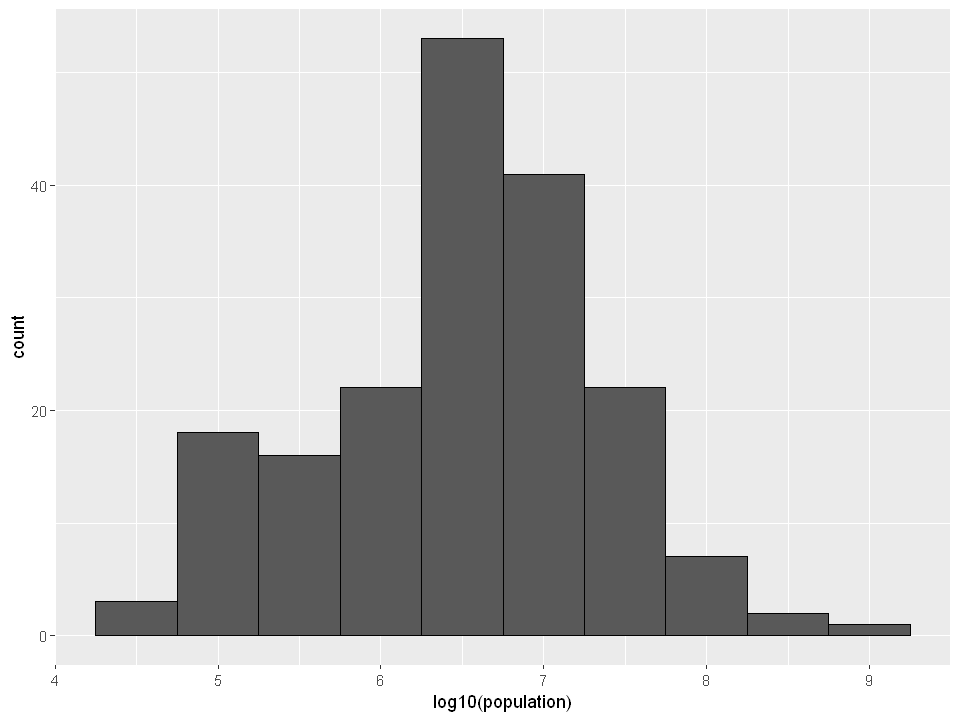

In [76]:
gapminder %>%
    filter(year == past_year) %>%
    ggplot(aes(log10(population))) +
    geom_histogram(binwidth = 0.5, color = "black")

In the above, we quickly see that country populations range between ten thousand and ten billion.

$~$
### 9.5.3 Transform the values or the scale?

There are two ways we can use log transformations in plots. We can log the values before plotting them or use log scales in the axes. Both approaches are useful and have different strengths. If we log the data, we can more easily interpret intermediate values in the scale. For example, if we see:

In [ ]:
----1----x----2--------3----

for log transformed data, we know that the value of  
x
  is about 1.5. If the scales are logged:

In [ ]:
----1----x----10------100---

then, to determine x, we need to compute  
10
1.5
 , which is not easy to do in our heads. The advantage of using logged scales is that we see the original values on the axes. However, the advantage of showing logged scales is that the original values are displayed in the plot, which are easier to interpret. For example, we would see “32 dollars a day” instead of “5 log base 2 dollars a day”.

As we learned earlier, if we want to scale the axis with logs, we can use the `scale_x_continuous` function. Instead of logging the values first, we apply this layer:

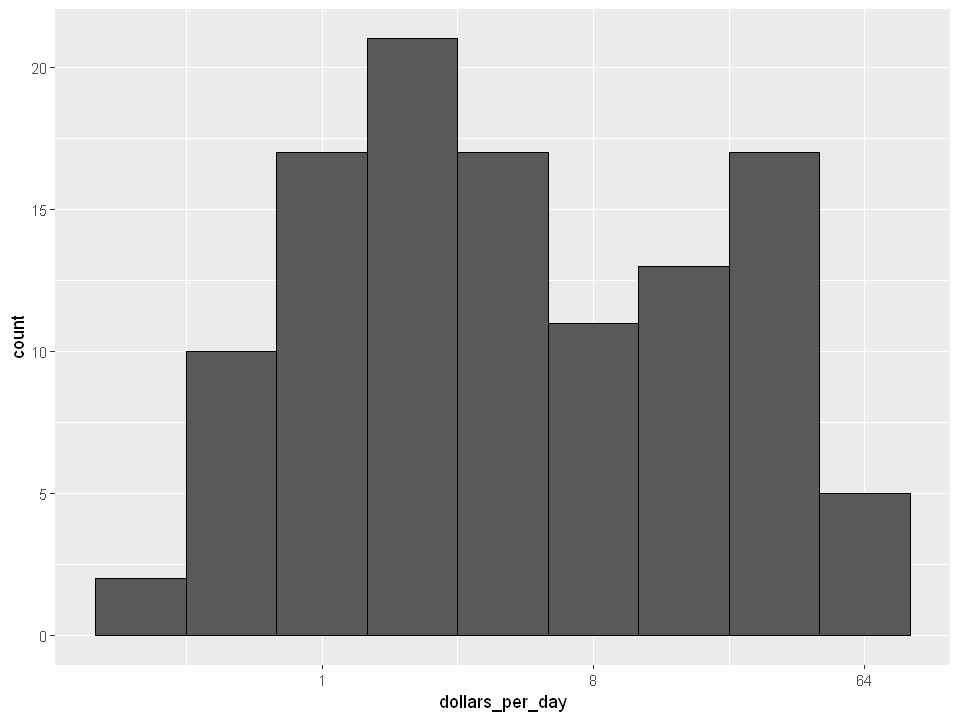

In [78]:
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2")

Note that the log base 10 transformation has its own function: `scale_x_log10()`, but currently base 2 does not, although we could easily define our own.

There are other transformations available through the `trans` argument. As we learn later on, the square root (`sqrt`) transformation is useful when considering counts. The logistic transformation (`logit`) is useful when plotting proportions between 0 and 1. The `reverse` transformation is useful when we want smaller values to be on the right or on top.

$~$
## 9.6 Visualizing multimodal distributions

In the histogram above we see _two bumps_: one at about 4 and another at about 32. In statistics these bumps are sometimes referred to as _modes_. The mode of a distribution is the value with the highest frequency. The mode of the normal distribution is the average. When a distribution, like the one above, doesn’t monotonically decrease from the mode, we call the locations where it goes up and down again _local modes_ and say that the distribution has _multiple modes_.

The histogram above suggests that the 1970 country income distribution has two modes: one at about 2 dollars per day (1 in the log 2 scale) and another at about 32 dollars per day (5 in the log 2 scale). This _bimodality_ is consistent with a dichotomous world made up of countries with average incomes less than \\$8 (3 in the log 2 scale) a day and countries above that.

$~$
## 9.7 Comparing multiple distributions with boxplots and ridge plots

A histogram showed us that the 1970 income distribution values show a dichotomy. However, the histogram does not show us if the two groups of countries are _west_ versus the _developing_ world.

Let’s start by quickly examining the data by region. We reorder the regions by the median value and use a log scale.

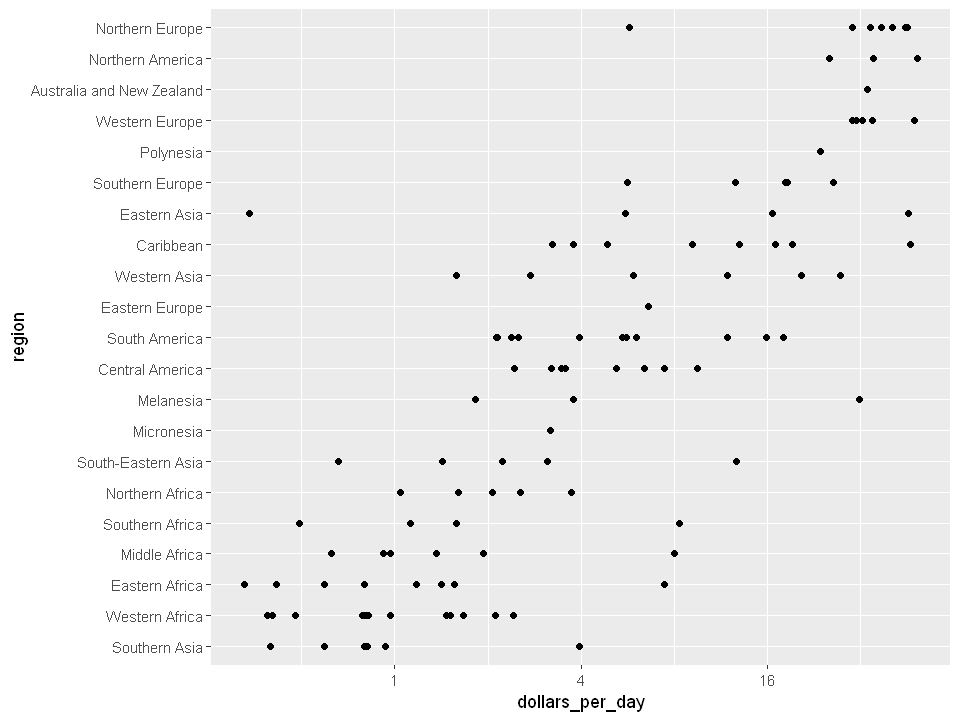

In [87]:
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
    ggplot(aes(dollars_per_day, region)) +
    geom_point() +
    scale_x_continuous(trans = "log2")

We can already see that there is indeed a “west versus the rest” dichotomy: we see two clear groups, with the rich group composed of North America, Northern and Western Europe, New Zealand and Australia. We define groups based on this observation:

In [4]:
gapminder <- gapminder %>%
    mutate(group = case_when(
        region %in% c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", 
                        "Australia and New Zealand") ~ "West",
        region %in% c("Eastern Asia", "South-Eastern Asia")~"East Asia",
        region %in% c("Caribbean", "Central America", "South America")~"Latin America",
        continent == "Africa" & region != "Northern Africa" ~ "Sub-Saharan",
        TRUE ~ "Others"))

We turn this `group` variable into a factor to control the order of the levels:

In [97]:
gapminder <- gapminder %>%
    mutate(group = factor(group, levels = c("Others", "Latin America", "East Asia", "Sub-Saharan", "West")))

In the next section we demonstrate how to visualize and compare distributions across groups.

$~$
### 9.7.1 Boxplots

The exploratory data analysis above has revealed two characteristics about average income distribution in 1970. Using a histogram, we found a bimodal distribution with the modes relating to poor and rich countries. We now want to compare the distribution across these five groups to confirm the “west versus the rest” dichotomy. The number of points in each category is large enough that a summary plot may be useful. We could generate five histograms or five density plots, but it may be more practical to have all the visual summaries in one plot. We therefore start by stacking boxplots next to each other. Note that we add the layer `theme(axis.text.x = element_text(angle = 90, hjust = 1))` to turn the group labels vertical, since they do not fit if we show them horizontally, and remove the axis label to make space.

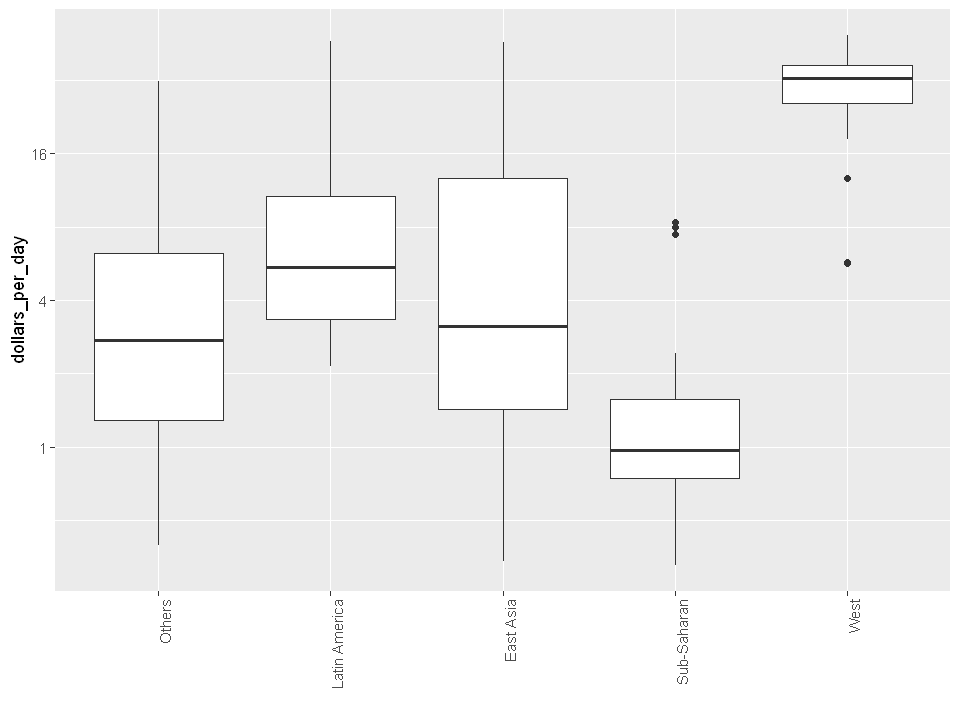

In [99]:
p <- gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(group, dollars_per_day)) +
    geom_boxplot() +
    scale_y_continuous(trans = "log2") +
    xlab("") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
p

Boxplots have the limitation that by summarizing the data into five numbers, we might miss important characteristics of the data. One way to avoid this is by showing the data.

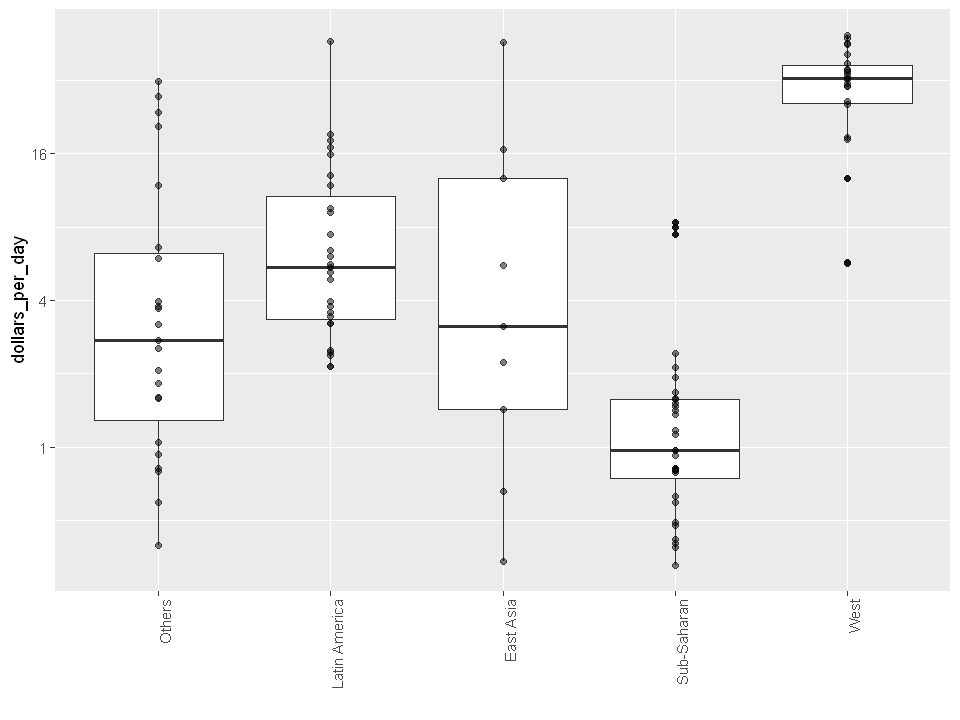

In [100]:
p+geom_point(alpha = 0.5)

### 9.7.2 Ridge plots

Showing each individual point does not always reveal important characteristics of the distribution. Although not the case here, when the number of data points is so large that there is over-plotting, showing the data can be counterproductive. Boxplots help with this by providing a five-number summary, but this has limitations too. For example, boxplots will not permit us to discover bimodal distributions. To see this, note that the two plots below are summarizing the same dataset:

In [ ]:
#image

In cases in which we are concerned that the boxplot summary is too simplistic, we can show stacked smooth densities or histograms. We refer to these as _ridge plots_. Because we are used to visualizing densities with values in the x-axis, we stack them vertically. Also, because more space is needed in this approach, it is convenient to overlay them. The package ggridges provides a convenient function for doing this. Here is the income data shown above with boxplots but with a ridge plot.

package 'ggridges' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\withj\AppData\Local\Temp\RtmpEHsezJ\downloaded_packages


Picking joint bandwidth of 0.648



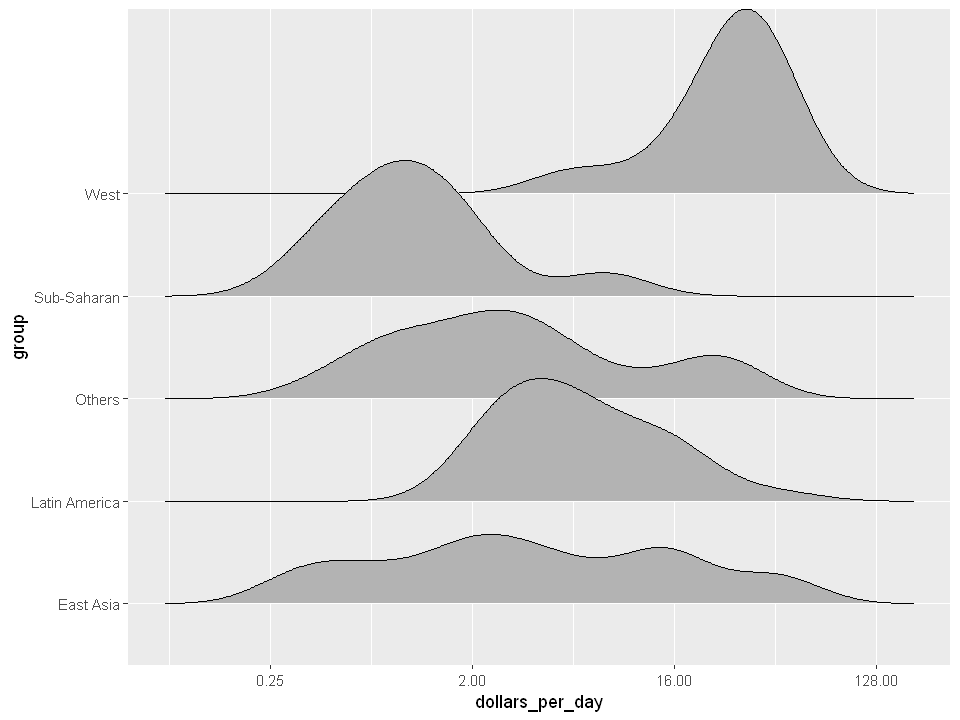

In [35]:
install.packages("ggridges")
library(ggridges)
p <- gapminder %>%
    filter(year == past_year & !is.na(dollars_per_day)) %>%
    ggplot(aes(dollars_per_day, group)) +
    scale_x_continuous(trans = "log2")
p + geom_density_ridges()

Note that we have to invert the `x` and `y` used for the boxplot. A useful `geom_density_ridges` parameter is `scale`, which lets you determine the amount of overlap, with scale = 1 meaning no overlap and larger values resulting in more overlap.

If the number of data points is small enough, we can add them to the ridge plot using the following code:

Picking joint bandwidth of 0.648



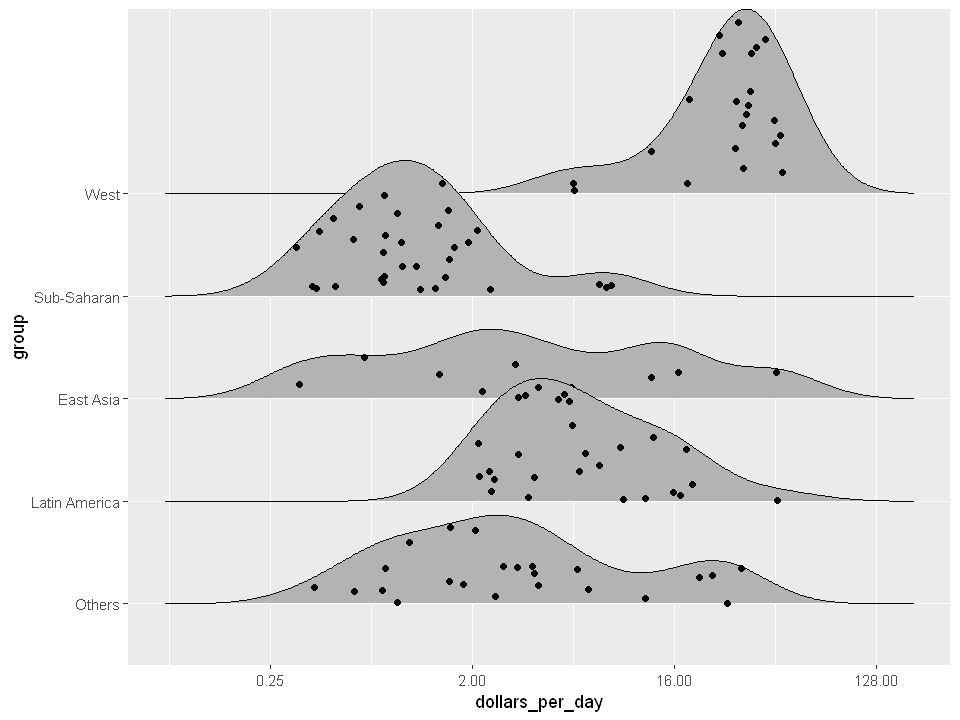

In [104]:
p + geom_density_ridges(jittered_points = TRUE)

By default, the height of the points is jittered and should not be interpreted in any way. To show data points, but without using jitter we can use the following code to add what is referred to as a _rug representation_ of the data.




Picking joint bandwidth of 0.648



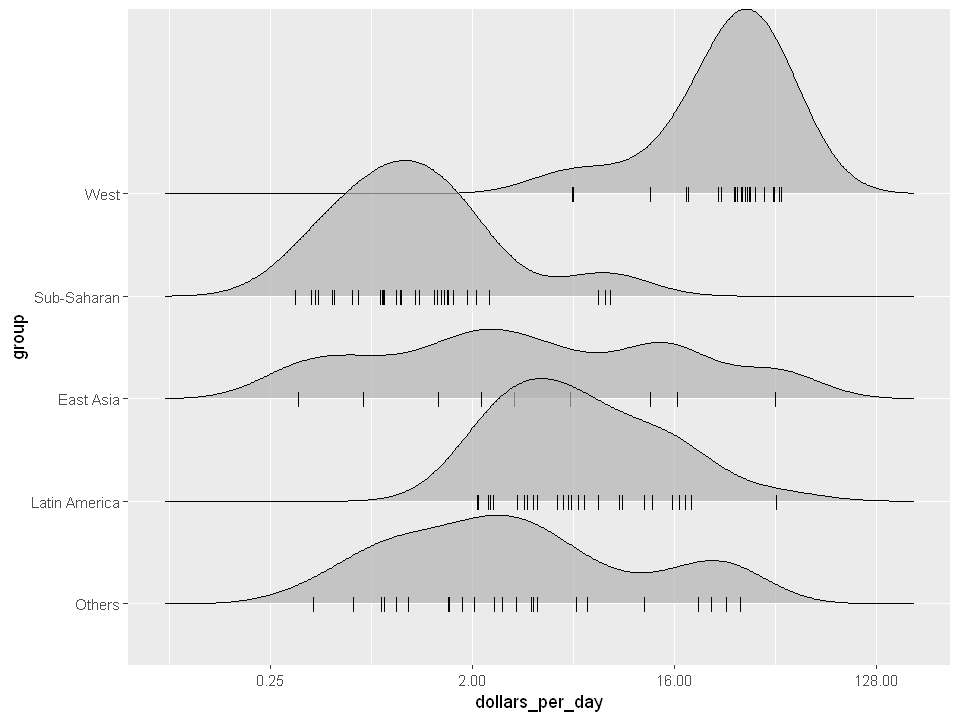

In [105]:
p + geom_density_ridges(jittered_points = TRUE,
                        position = position_points_jitter(height = 0),
                        point_shape = '|', point_size = 3, 
                        point_alpha = 1, alpha = 0.7)

### 9.7.3 Example: 1970 versus 2010 income distributions

Data exploration clearly shows that in 1970 there was a “west versus the rest” dichotomy. But does this dichotomy persist? Let’s use `facet_grid` see how the distributions have changed. To start, we will focus on two groups: the west and the rest. We make four histograms.



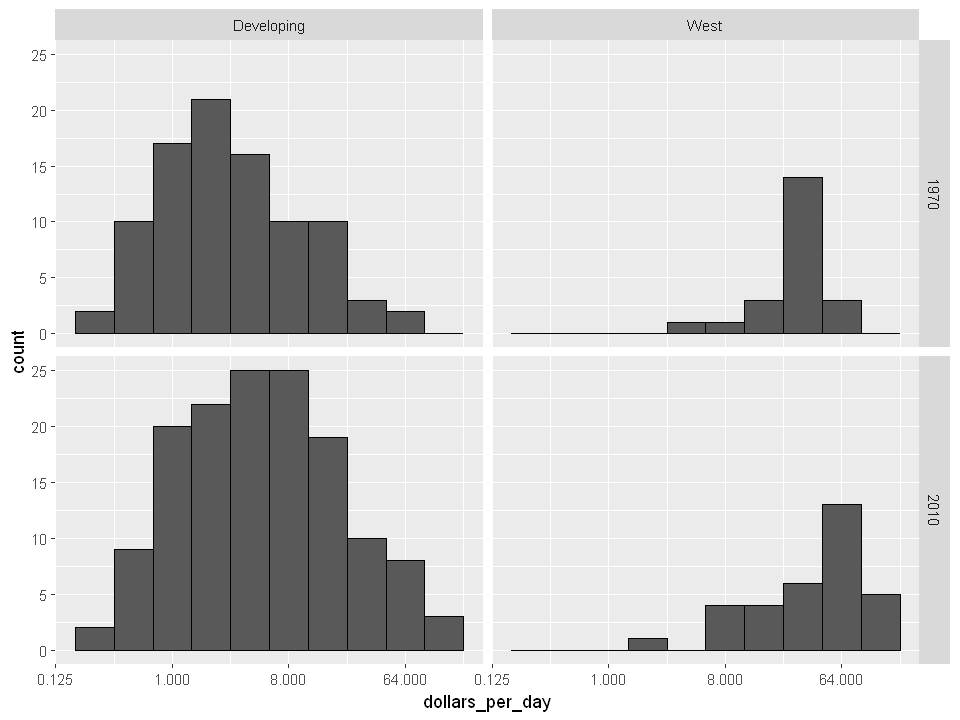

In [7]:
past_year <-1970
present_year <-2010
years <-c(past_year, present_year)
gapminder %>%
    filter(year %in% years & !is.na(gdp)) %>%
    mutate(west = ifelse(group == "West", "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(year ~ west)

Before we interpret the findings of this plot, we notice that there are more countries represented in the 2010 histograms than in 1970: the total counts are larger. One reason for this is that several countries were founded after 1970. For example, the Soviet Union divided into several countries during the 1990s. Another reason is that data was available for more countries in 2010.

We remake the plots using only countries with data available for both years. In the data wrangling part of this book, we will learn __tidyverse__ tools that permit us to write efficient code for this, but here we can use simple code using the`intersect` function:

In [8]:
country_list_1 <- gapminder %>%
    filter(year == past_year & !is.na(dollars_per_day))%>%
    pull(country)

country_list_2 <- gapminder %>%
    filter(year == present_year & !is.na(dollars_per_day)) %>%
    pull(country)

country_list <- intersect(country_list_1, country_list_2)

These 108 account for 86% of the world population, so this subset should be representative.

Let’s remake the plot, but only for this subset by simply adding `country %in% country_list` to the `filter` function:

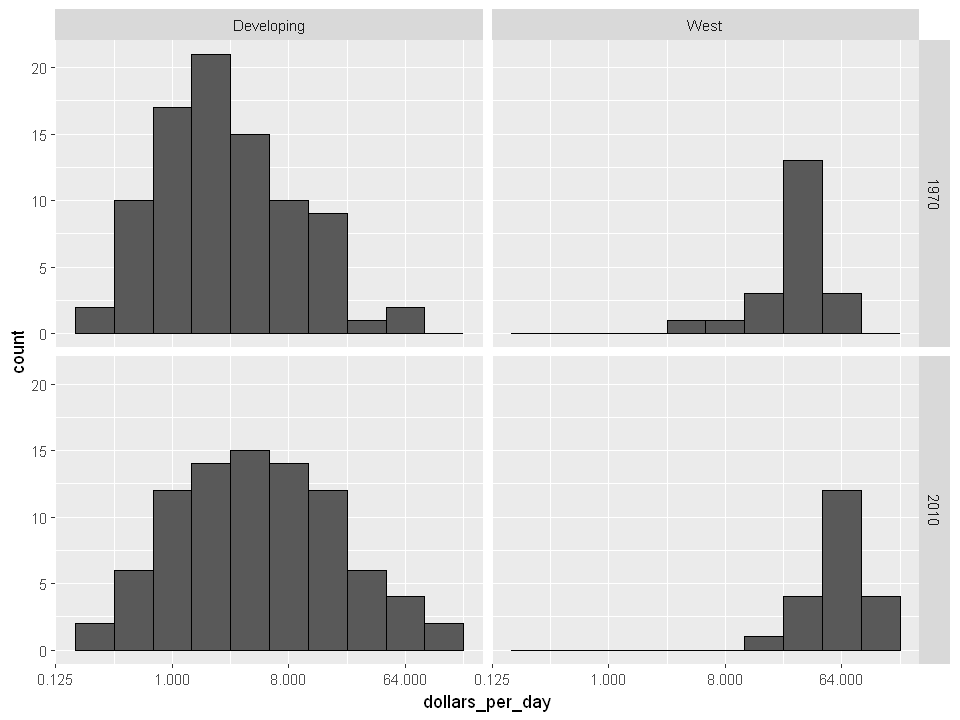

In [9]:
ast_year <-1970
present_year <-2010
years <-c(past_year, present_year)
gapminder %>%
    filter(year %in% years & !is.na(gdp) & country%in% country_list) %>%
    mutate(west = ifelse(group == "West", "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(year ~ west)

We now see that the rich countries have become a bit richer, but percentage-wise, the poor countries appear to have improved more. In particular, we see that the proportion of developing countries earning more than $16 a day increased substantially.

To see which specific regions improved the most, we can remake the boxplots we made above, but now adding the year 2010 and then using facet to compare the two years.

 

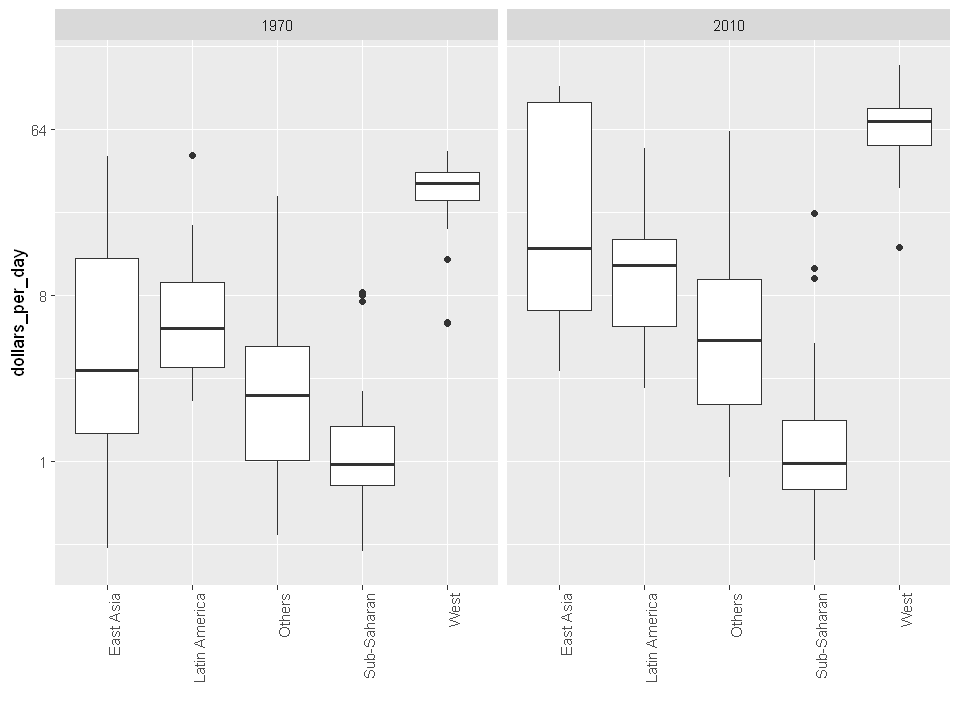

In [11]:
gapminder %>%
    filter(year %in% years & country%in% country_list) %>%
    ggplot(aes(group, dollars_per_day)) +
    geom_boxplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    scale_y_continuous(trans = "log2") +
    xlab("") +
    facet_grid(.~year)

Here, we pause to introduce another powerful __ggplot2__ feature. Because we want to compare each region before and after, it would be convenient to have the 1970 boxplot next to the 2010 boxplot for each region. In general, comparisons are easier when data are plotted next to each other.

So instead of faceting, we keep the data from each year together and ask to color (or fill) them depending on the year. Note that groups are automatically separated by year and each pair of boxplots drawn next to each other. Because year is a number, we turn it into a factor since __ggplot2__ automatically assigns a color to each category of a factor. Note that we have to convert the year columns from numeric to factor.

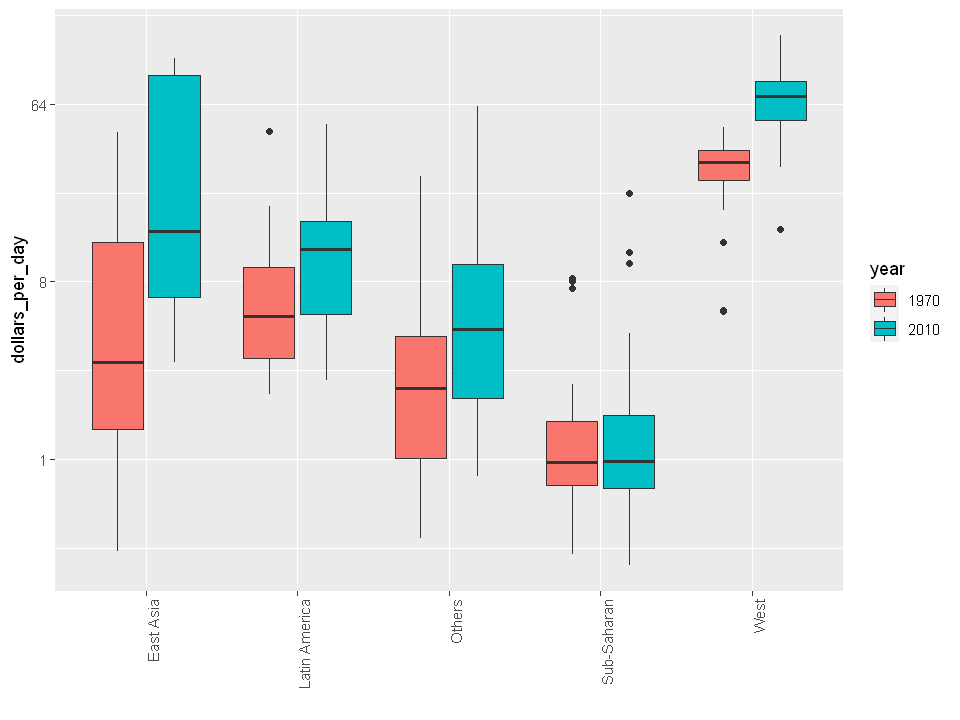

In [13]:
gapminder %>%
    filter(year %in% years & country %in% country_list) %>%
    mutate(year = factor(year)) %>%
    ggplot(aes(group, dollars_per_day, fill = year)) +
    geom_boxplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    scale_y_continuous(trans = "log2") +
    xlab("")

Finally, we point out that if what we are most interested in is comparing before and after values, it might make more sense to plot the percentage increases. We are still not ready to learn to code this, but here is what the plot would look like:



In [ ]:
#image

The previous data exploration suggested that the income gap between rich and poor countries has narrowed considerably during the last 40 years. We used a series of histograms and boxplots to see this. We suggest a succinct way to convey this message with just one plot.

Let’s start by noting that density plots for income distribution in 1970 and 2010 deliver the message that the gap is closing:

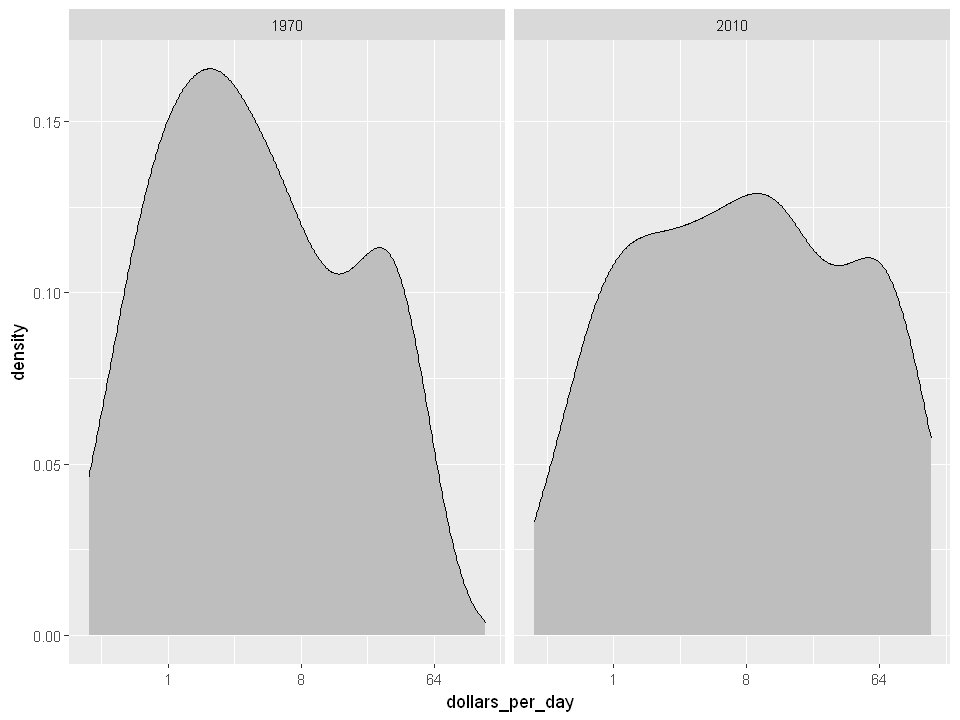

In [15]:
gapminder %>%
    filter(year %in% years & country %in% country_list) %>%
    ggplot(aes(dollars_per_day)) +
    geom_density(fill = "grey") +
    scale_x_continuous(trans = "log2") +
    facet_grid(.~year)

In the 1970 plot, we see two clear modes: poor and rich countries. In 2010, it appears that some of the poor countries have shifted towards the right, closing the gap.

The next message we need to convey is that the reason for this change in distribution is that several poor countries became richer, rather than some rich countries becoming poorer. To do this, we can assign a color to the groups we identified during data exploration.

However, we first need to learn how to make these smooth densities in a way that preserves information on the number of countries in each group. To understand why we need this, note the discrepancy in the size of each group:

In [23]:
#gapminder %>%
#    filter(year %in% years & !is.na(gdp) & country%in% country_list) %>%
#    mutate(west = ifelse(group == "West", "West", "Developing")) %>%
#    count(west)

But when we overlay two densities, the default is to have the area represented by each distribution add up to 1, regardless of the size of each group:

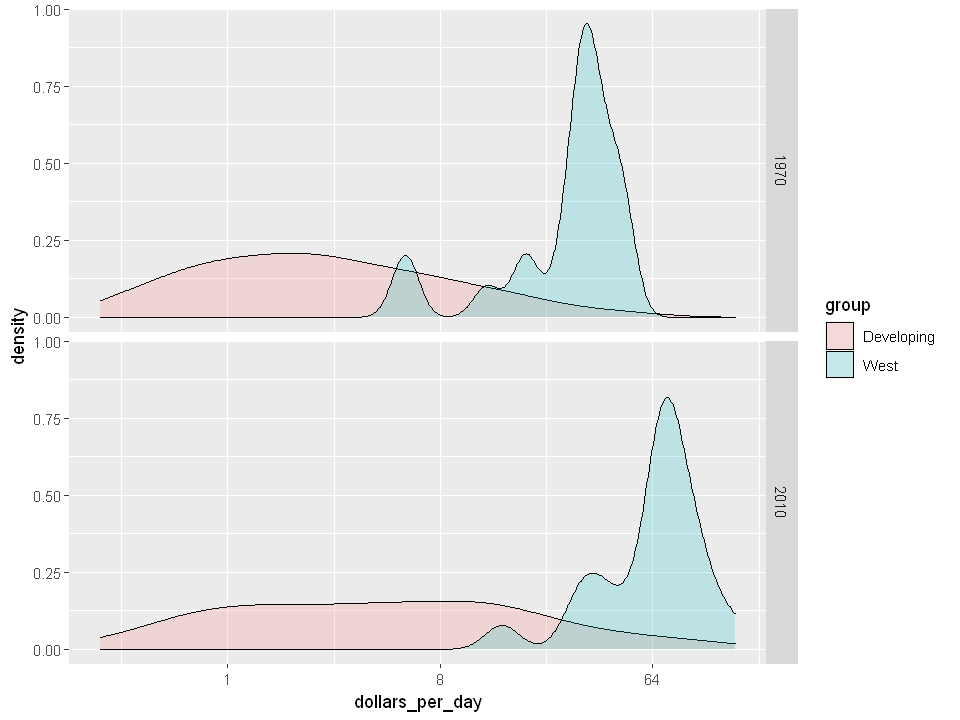

In [26]:
gapminder %>%
    filter(year %in% years & country %in% country_list) %>%
    mutate(group = ifelse(group == "West", "West", "Developing")) %>%
    ggplot(aes(dollars_per_day, fill = group)) +
    scale_x_continuous(trans = "log2") +
    geom_density(alpha = 0.2) +
    facet_grid(year ~ .)

This makes it appear as if there are the same number of countries in each group. To change this, we will need to learn to access computed variables with `geom_density` function.

$~$
### 9.7.4 Accessing computed variables

To have the areas of these densities be proportional to the size of the groups, we can simply multiply the y-axis values by the size of the group. From the `geom_density` help file, we see that the functions compute a variable called `count` that does exactly this. We want this variable to be on the y-axis rather than the density.

In __ggplot2__, we access these variables by surrounding the name with two dots. We will therefore use the following mapping:

In [27]:
aes(x = dollars_per_day, y = ..count..)

Aesthetic mapping: 
* `x` -> `dollars_per_day`
* `y` -> `..count..`

We can now create the desired plot by simply changing the mapping in the previous code chunk. We will also expand the limits of the x-axis.

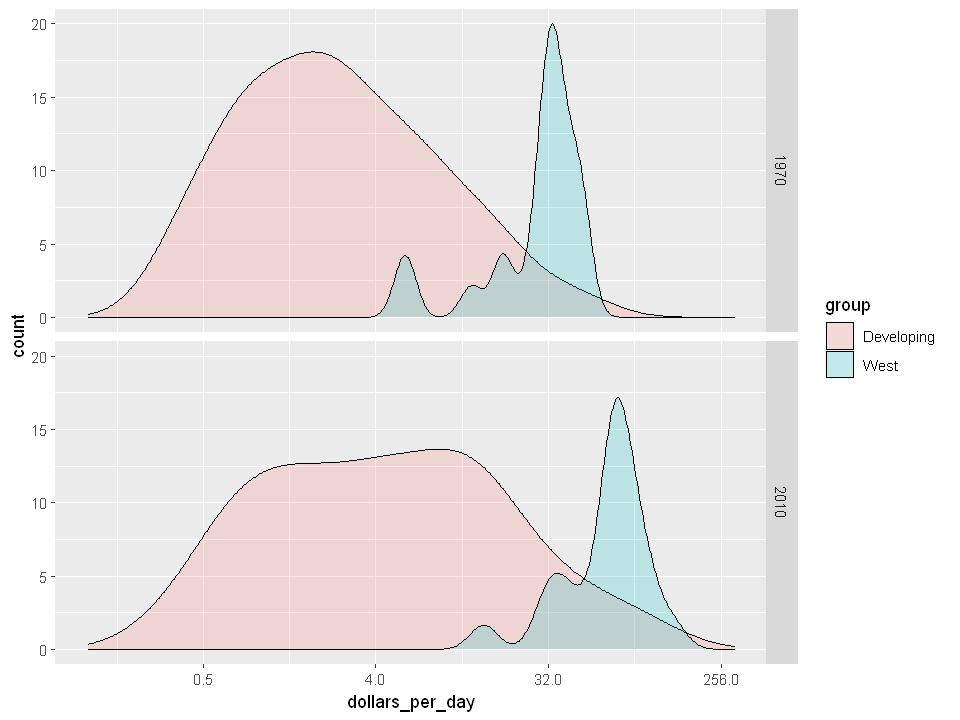

In [29]:
p <- gapminder %>%
    filter(year %in% years & country %in% country_list) %>%
    mutate(group = ifelse(group == "West", "West", "Developing")) %>%
    ggplot(aes(dollars_per_day, y = ..count.., fill = group)) +
    scale_x_continuous(trans = 'log2', limit = c(0.125, 300))

p + geom_density(alpha = 0.2) +
    facet_grid(year ~ .)

If we want the densities to be smoother, we use the bw argument so that the same bandwidth is used in each density. We selected 0.75 after trying out several values.

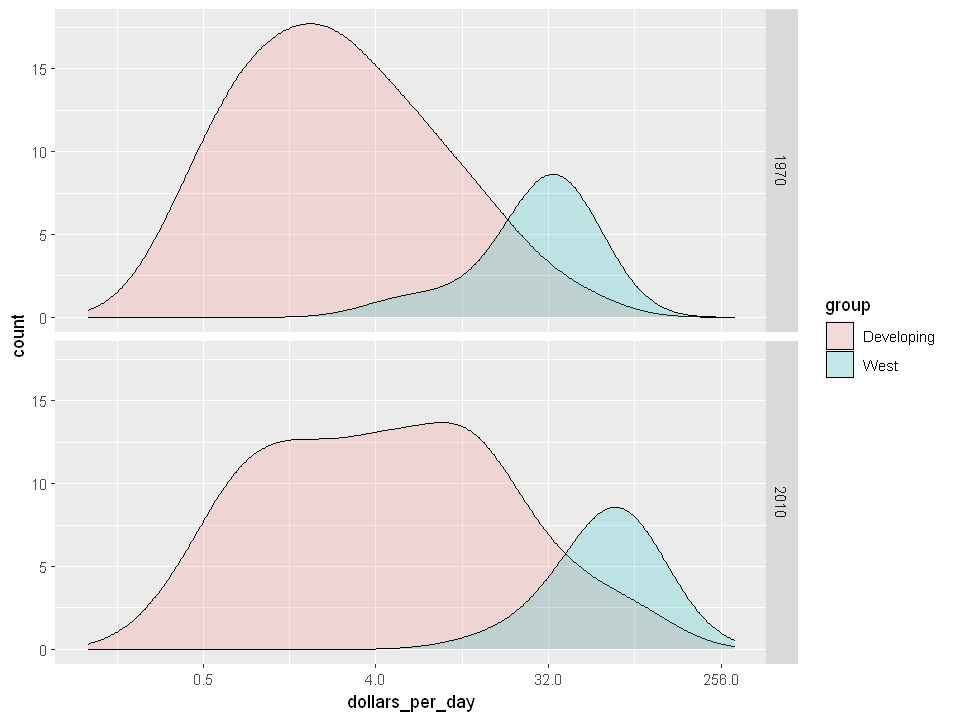

In [33]:
p + geom_density(alpha = 0.2, bw = 0.75) + facet_grid(year ~.)

This plot now shows what is happening very clearly. The developing world distribution is changing. A third mode appears consisting of the countries that most narrowed the gap.

To visualize if any of the groups defined above are driving this we can quickly make a ridge plot:

Warning message:
"Ignoring unknown parameters: adjust"
Picking joint bandwidth of 0.648

Picking joint bandwidth of 0.726



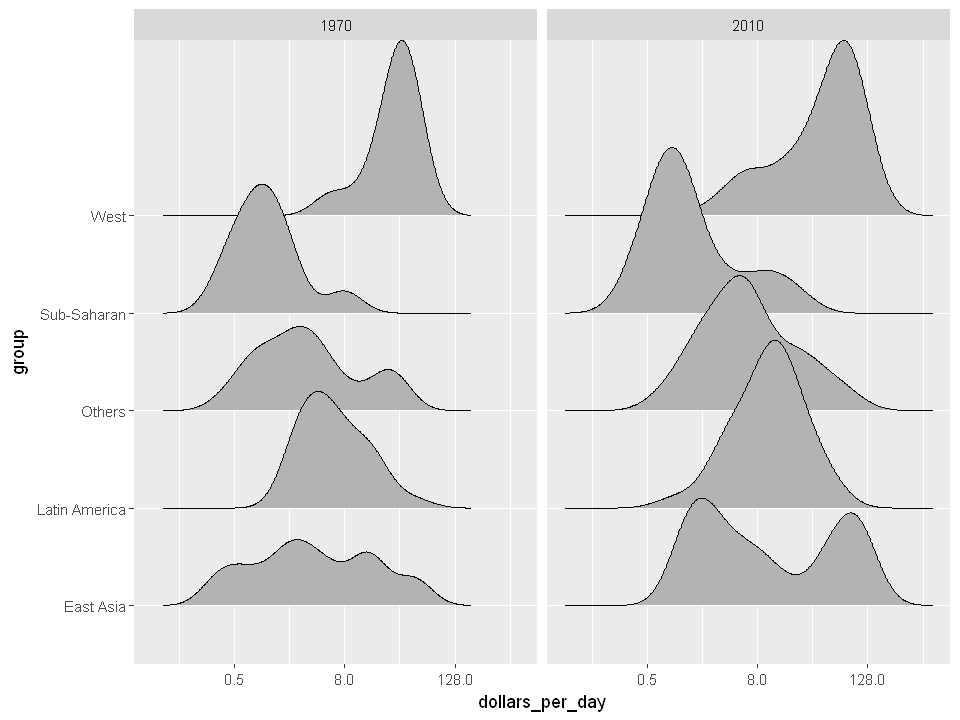

In [36]:
gapminder %>%
    filter(year %in% years & !is.na(dollars_per_day)) %>%
    ggplot(aes(dollars_per_day, group)) +
    scale_x_continuous(trans = "log2") +
    geom_density_ridges(adjust = 1.5) +
    facet_grid(.~year)

Another way to achieve this is by stacking the densities on top of each other:

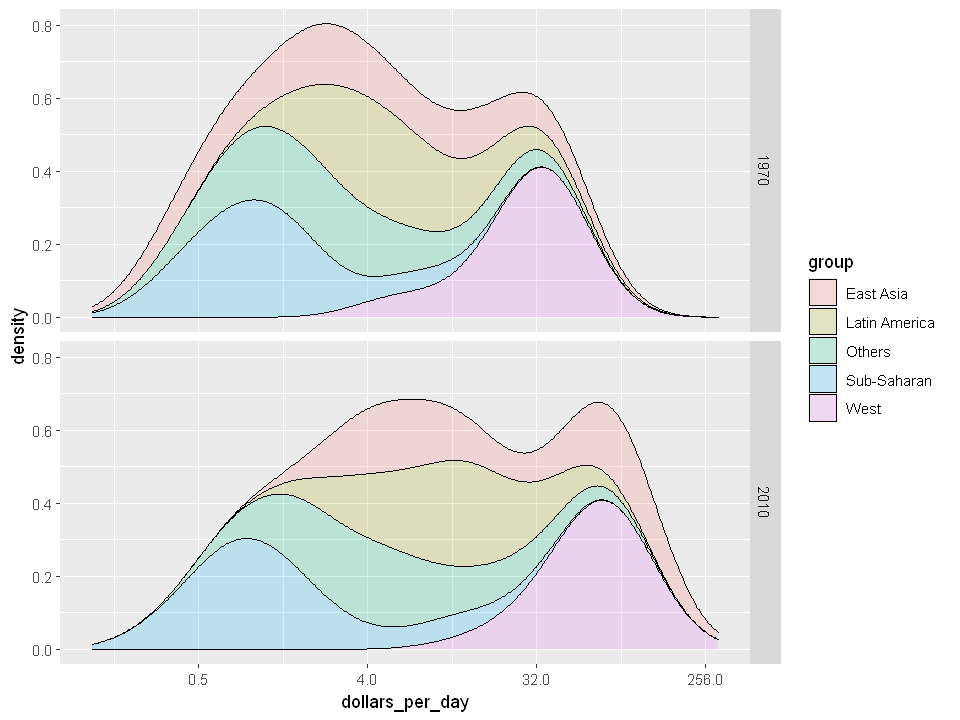

In [38]:
gapminder %>%
    filter(year %in% years & country %in% country_list) %>%
    group_by(year) %>% # 왜하는 걸까?
    mutate(weight = population/sum(population)*2) %>% # 왜 하는 거지?
    ungroup() %>% #왜 하는 거야
    ggplot(aes(dollars_per_day, fill = group)) +
    scale_x_continuous(trans = "log2", limit = c(0.135, 300)) +
    geom_density(alpha = 0.2, bw = 0.75, position = "stack") +
    facet_grid(year ~.)

Here we can clearly see how the distributions for East Asia, Latin America, and others shift markedly to the right. While Sub-Saharan Africa remains stagnant.

Notice that we order the levels of the group so that the West’s density is plotted first, then Sub-Saharan Africa. Having the two extremes plotted first allows us to see the remaining bimodality better.

$~$
### 9.7.5 Weighted densities

As a final point, we note that these distributions weigh every country the same. So if most of the population is improving, but living in a very large country, such as China, we might not appreciate this. We can actually weight the smooth densities using the weight mapping argument. The plot then looks like this:

In [ ]:
# image

This particular figure shows very clearly how the income distribution gap is closing with most of the poor remaining in Sub-Saharan Africa.

$~$
## 9.8 The ecological fallacy and importance of showing the data
Throughout this section, we have been comparing regions of the world. We have seen that, on average, some regions do better than others. In this section, we focus on describing the importance of variability within the groups when examining the relationship between a country’s infant mortality rates and average income.

We define a few more regions and compare the averages across regions:

The relationship between these two variables is almost perfectly linear and the graph shows a dramatic difference. While in the West less than 0.5% of infants die, in Sub-Saharan Africa the rate is higher than 6%!

Note that the plot uses a new transformation, the logistic transformation.

$~$
## 9.8.1 Logistic transformation
The logistic or logit transformation for a proportion or rate $p$ is defined as:
$$ f(p) = log(\frac{p}{1-p})$$
When $p$ is a proportion or probability, the quantity that is being logged, $p/(1-p)$, is called the odds. In this case $p$ is the proportion of infants that survived. The odds tell us how many more infants are expected to survive than to die. The log transformation makes this symmetric. If the rates are the same, then the log odds is 0. Fold increases or decreases turn into positive and negative increments, respectively.

This scale is useful when we want to highlight differences near 0 or 1. For survival rates this is important because a survival rate of 90% is unacceptable, while a survival of 99% is relatively good. We would much prefer a survival rate closer to 99.9%. We want our scale to highlight these difference and the logit does this. Note that 99.9/0.1 is about 10 times bigger than 99/1 which is about 10 times larger than 90/10. By using the log, these fold changes turn into constant increases.

$~$
### 9.8.2 Show the data
Now, back to our plot. Based on the plot above, do we conclude that a country with a low income is destined to have low survival rate? Do we conclude that survival rates in Sub-Saharan Africa are all lower than in Southern Asia, which in turn are lower than in the Pacific Islands, and so on?

Jumping to this conclusion based on a plot showing averages is referred to as the ecological fallacy. The almost perfect relationship between survival rates and income is only observed for the averages at the region level. Once we show all the data, we see a somewhat more complicated story:

In [ ]:
#image

Specifically, we see that there is a large amount of variability. We see that countries from the same regions can be quite different and that countries with the same income can have different survival rates. For example, while on average Sub-Saharan Africa had the worse health and economic outcomes, there is wide variability within that group. Mauritius and Botswana are doing better than Angola and Sierra Leone, with Mauritius comparable to Western countries.

